# <center>Finance Terminologies in Python</center>

## Import Libraries and Financial Data from API

Importing all the necessary libraries.<br> Alpha_vintage library is used to get the financial data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from alpha_vantage.timeseries import TimeSeries

Defined a "metadata" variable which will be storing information about the dataset retrieved.
Then, applied the .get_daily_adjusted() method to obtain the adjusted closing prices for the designated stock.<br>
Considered the Proctor & Gamble, Micrsoft, Ford, AT&T and Apple for further analysis.

In [2]:
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')

In [3]:
tickers = ['PG', 'MSFT', 'T', 'F', 'AAPL']
data = pd.DataFrame()
for t in tickers:
    stock, metadata = ts.get_daily_adjusted(t, outputsize='full')
    data[t]=stock['5. adjusted close'][50:]

In [4]:
data.head()

,PG,MSFT,T,F,AAPL
date,,,,,
2020-01-08,121.7832,159.6552,38.8493,9.0960,302.4623
2020-01-07,121.2663,157.1520,38.7309,9.0960,297.6738
2020-01-06,122.0218,158.5981,38.5829,9.0075,299.0804
2020-01-03,121.8528,158.1892,38.5434,9.0567,296.7161
2020-01-02,122.6779,160.1838,38.3461,9.2632,299.6291


In [5]:
data.tail()

,PG,MSFT,T,F,AAPL
date,,,,,
2000-03-24,16.5815,35.9087,14.5406,19.1586,4.2990
2000-03-23,16.5081,35.9665,14.7299,19.1028,4.3802
2000-03-22,16.7461,33.1952,14.6454,18.8882,4.4695
2000-03-21,16.7461,33.0344,15.3014,19.6651,4.1827
2000-03-20,17.0781,31.3048,15.0275,18.7808,3.8126


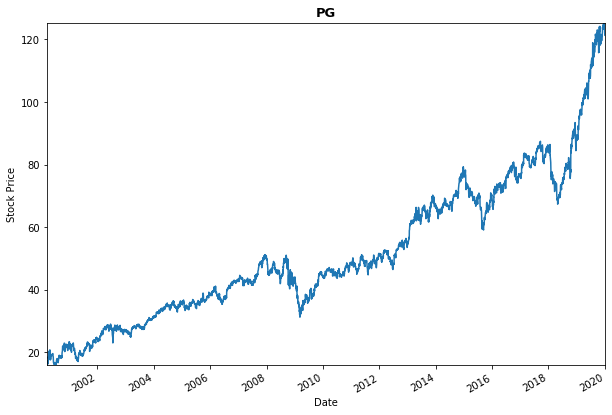

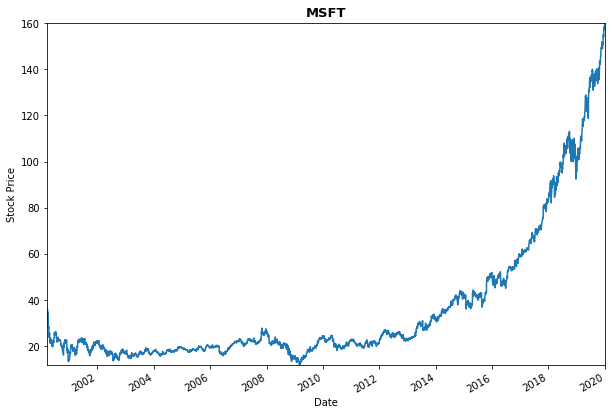

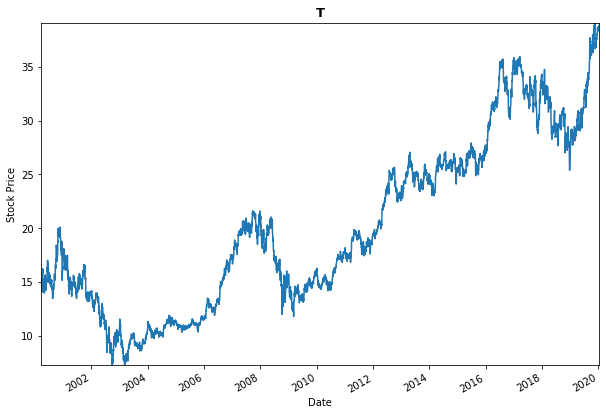

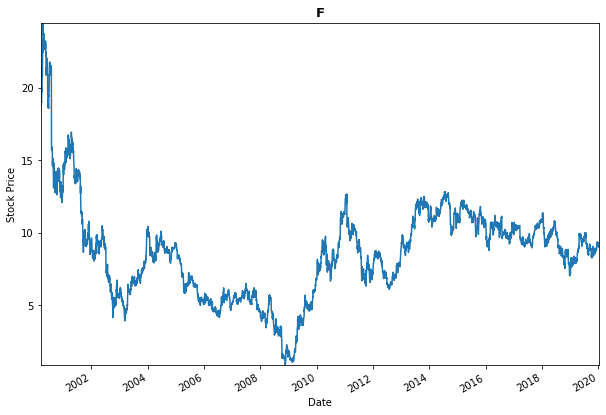

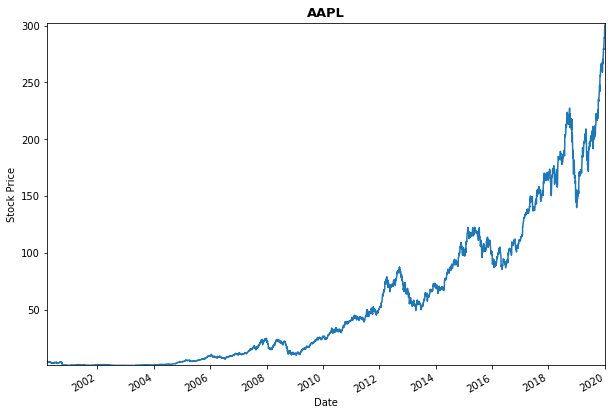

In [6]:
for t in tickers:
    data[t].plot(figsize=(10, 7))
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.ylim(data[t].min(),data[t].max())
    plt.title(t,fontweight="bold",fontsize=13)
    plt.show()

## Normalization to 100

$$
\frac {P_t}{P_0} * 100
$$

In [7]:
data.iloc[-1]

PG      17.0781
MSFT    31.3048
T       15.0275
F       18.7808
AAPL     3.8126
Name: 2000-03-20 00:00:00, dtype: float64

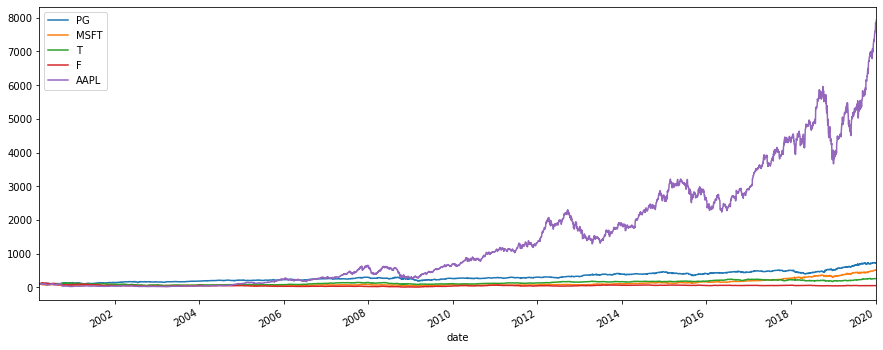

In [8]:
(data / data.iloc[-1] * 100).plot(figsize = (15, 6));
plt.show()

From the above graphs it is evident, 

## Simple Rate of Return of a Security

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

We use the shift method to compare $P_{0}$ and $P_{1}$.<br>Calculated the mean daily simple rate of return for all the 5 stocks in

In [9]:
data_simple_return = pd.DataFrame()
for t in tickers:
    data_simple_return[t] = (data[t] / data[t].shift(1)) - 1

Calculated the max and min to get an idea about the range of Simple rate of Return for all the 5 stocks.

In [10]:
data_simple_return.max()

PG      0.103178
MSFT    0.184934
T       0.144978
F       0.343722
AAPL    1.077742
dtype: float64

In [11]:
data_simple_return.min()

PG     -0.092677
MSFT   -0.163703
T      -0.140010
F      -0.227949
AAPL   -0.122077
dtype: float64

By multiplying the mean daily simple rate of return with 250, we get annual  simple rate of return for all the 5 stocks.

In [12]:
data_simple_return.mean()* 250

PG     -0.080507
MSFT   -0.037383
T      -0.016777
F       0.123327
AAPL   -0.130078
dtype: float64

In [13]:
print (str(round(data_simple_return.mean()* 250, 5) * 100))

PG      -8.051
MSFT    -3.738
T       -1.678
F       12.333
AAPL   -13.008
dtype: float64


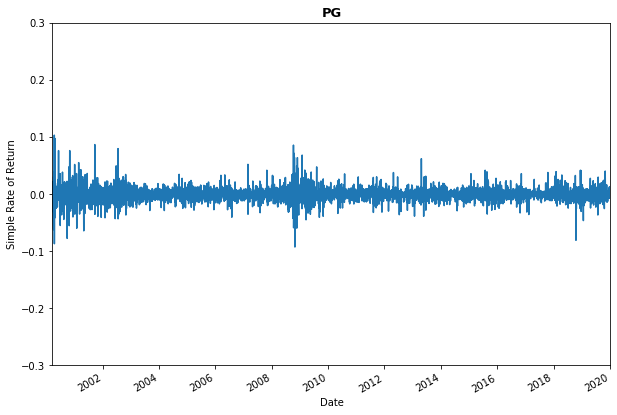

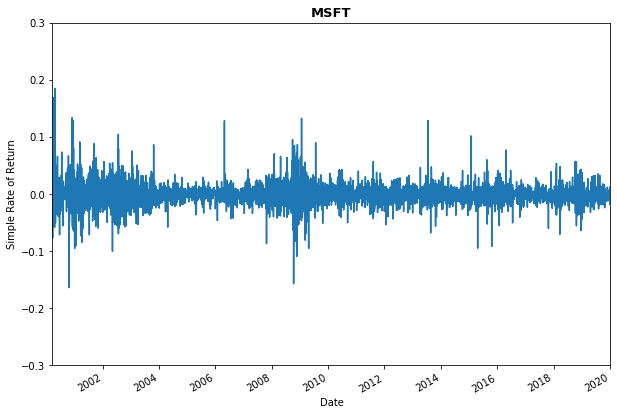

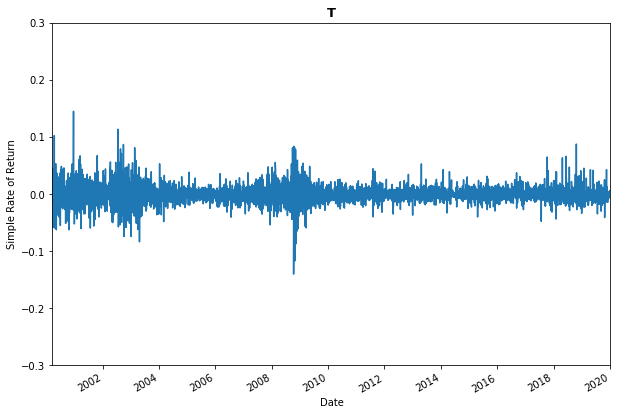

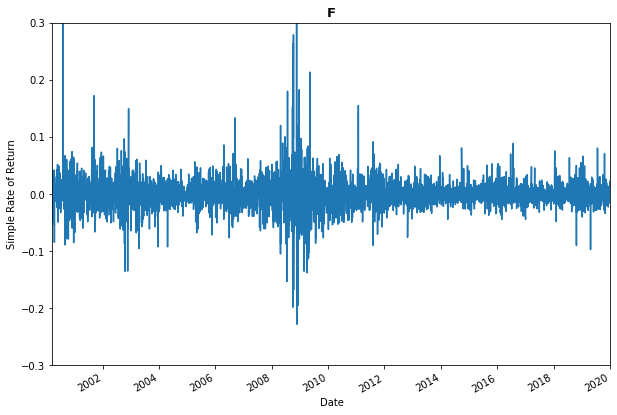

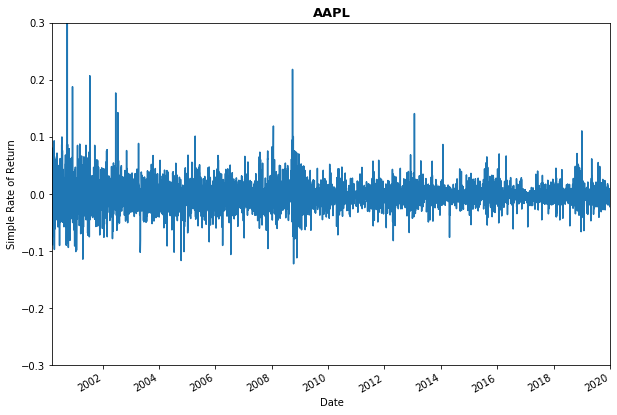

In [14]:
for t in tickers:
    data_simple_return[t].plot(figsize=(10, 7))
    plt.xlabel('Date')
    plt.ylabel('Simple Rate of Return')
    plt.ylim(-.3,.3)
    plt.title(t,fontweight="bold",fontsize=13)
    plt.show()

From the above plots it is evident that 

## Log Return of a Security

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [15]:
data_log_return = pd.DataFrame()
for t in tickers:
    data_log_return[t] = np.log(data[t] / data[t].shift(1)) 

In [16]:
data_log_return

,PG,MSFT,T,F,AAPL
date,,,,,
2020-01-08,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.004253,-0.015803,-0.003052,0.000000,-0.015958
2020-01-06,0.006211,0.009160,-0.003829,-0.009777,0.004714
2020-01-03,-0.001386,-0.002582,-0.001024,0.005447,-0.007937
2020-01-02,0.006748,0.012530,-0.005132,0.022545,0.009770
...,...,...,...,...,...
2000-03-24,0.021309,0.070760,-0.004406,0.009909,-0.006238
2000-03-23,-0.004436,0.001608,0.012935,-0.002917,0.018712
2000-03-22,0.014314,-0.080183,-0.005753,-0.011298,0.020182


In [17]:
data_log_return.min()

PG     -0.097257
MSFT   -0.178771
T      -0.150835
F      -0.258705
AAPL   -0.130196
dtype: float64

In [18]:
data_log_return.max()

PG      0.098195
MSFT    0.169687
T       0.135385
F       0.295443
AAPL    0.731282
dtype: float64

In [19]:
data_log_return.mean()* 250

PG     -0.098577
MSFT   -0.081757
T      -0.047662
F       0.036381
AAPL   -0.219472
dtype: float64

In [20]:
print (str(round(data_log_return.mean()* 250, 5) * 100))

PG      -9.858
MSFT    -8.176
T       -4.766
F        3.638
AAPL   -21.947
dtype: float64


## Risk of a Security

In [21]:
data_log_return.std() * 250 ** 0.5

PG      0.189978
MSFT    0.297773
T       0.248483
F       0.416203
AAPL    0.412953
dtype: float64

In [22]:
print (str(round(data_log_return.std() * 250 ** 0.5, 5) * 100))

PG      18.998
MSFT    29.777
T       24.848
F       41.620
AAPL    41.295
dtype: float64


## Return of a Portfolio of Securities

In [23]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [24]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [25]:
pfolio = np.dot(data_log_return, weights)*250
pfolio

array([        nan, -1.9533587 ,  0.32395149, ..., -3.1368479 ,
        0.64753591, -9.54324739])

In [26]:
pfolio = round(np.dot(data_log_return.mean(), weights)*250, 5) * 100
pfolio

-8.222

## Risk of a Portfolio of Securities

In [27]:
data_log_return.cov()

,PG,MSFT,T,F,AAPL
PG,0.000144,0.000063,0.000070,0.000075,0.000052
MSFT,0.000063,0.000355,0.000105,0.000164,0.000204
T,0.000070,0.000105,0.000247,0.000132,0.000100
F,0.000075,0.000164,0.000132,0.000693,0.000175
AAPL,0.000052,0.000204,0.000100,0.000175,0.000682


In [28]:
data_log_return.corr()

,PG,MSFT,T,F,AAPL
PG,1.000000,0.276313,0.370379,0.237742,0.165034
MSFT,0.276313,1.000000,0.355312,0.330170,0.414793
T,0.370379,0.355312,1.000000,0.319664,0.243580
F,0.237742,0.330170,0.319664,1.000000,0.254176
AAPL,0.165034,0.414793,0.243580,0.254176,1.000000


Porfolio Variance

In [29]:
pfolio_var = round(np.dot(weights.T, np.dot(data_log_return.cov() * 250, weights)),5)
round(pfolio_var*100,5)

4.4

Portfolio Volatility

In [30]:
pfolio_vol = round(np.dot(weights.T, np.dot(data_log_return.cov() * 250 , weights)),5) ** 0.5
round(pfolio_vol*100,5)

20.97618

## Diversifiable and Non-Diversifiable Risk of a Portfolio

In [31]:
data_log_return.var()*250

PG      0.036091
MSFT    0.088669
T       0.061744
F       0.173225
AAPL    0.170530
dtype: float64

In [32]:
dr_risk=pfolio_var
index=0
for t in tickers:
    dr_risk=dr_risk-(weights[index] ** 2 * data_log_return[t].var()*250)
    index=index+1
round(dr_risk,5)

0.02279

In [33]:
n_dr_risk=pfolio_var-dr_risk
round(n_dr_risk,5)

0.02121

In [34]:
index=0
n_dr_risk=0
for t in tickers:
    n_dr_risk=n_dr_risk+(weights[index] ** 2 * data_log_return[t].var()*250)
    index=index+1
round(n_dr_risk,5)

0.02121

## Beta of a Stock, Sharpe Ratio & CAPM

In [35]:
ticker_frontier=['AAPL','^GSPC']

In [36]:
data_frontier = pd.DataFrame()
for t in ticker_frontier:
    stock, metadata = ts.get_daily_adjusted(t, outputsize='full')
    data_frontier[t]=stock['5. adjusted close'][50:]

In [37]:
data_frontier

,AAPL,^GSPC
date,,
2020-01-08,302.4623,3253.0500
2020-01-07,297.6738,3237.1799
2020-01-06,299.0804,3246.2800
2020-01-03,296.7161,3234.8501
2020-01-02,299.6291,3257.8501
...,...,...
2000-03-24,4.2990,1527.4600
2000-03-23,4.3802,1527.3500
2000-03-22,4.4695,1500.6400


In [38]:
data_frontier.iloc[0]

AAPL      302.4623
^GSPC    3253.0500
Name: 2020-01-08 00:00:00, dtype: float64

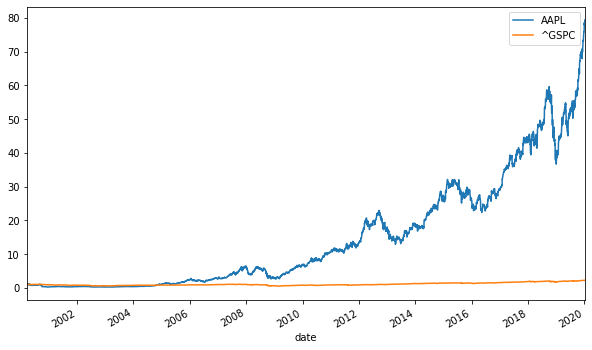

In [39]:
(data_frontier / data_frontier.iloc[-1]).plot(figsize = (10, 6));
plt.show()

In [40]:
data_frontier_log=np.log(data_frontier/data_frontier.shift(1))
data_frontier_log

,AAPL,^GSPC
date,,
2020-01-08,NaN,NaN
2020-01-07,-0.015958,-0.004890
2020-01-06,0.004714,0.002807
2020-01-03,-0.007937,-0.003527
2020-01-02,0.009770,0.007085
...,...,...
2000-03-24,-0.006238,0.002360
2000-03-23,0.018712,-0.000072
2000-03-22,0.020182,-0.017643


In [41]:
cov=data_frontier_log.cov() * 250
cov

,AAPL,^GSPC
AAPL,0.170530,0.039636
^GSPC,0.039636,0.035065


In [42]:
data_frontier_log.mean() * 250

AAPL    -0.219472
^GSPC   -0.040319
dtype: float64

In [43]:
data_frontier_log.corr()

,AAPL,^GSPC
AAPL,1.000000,0.512566
^GSPC,0.512566,1.000000


In [44]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.0396358238694288

In [45]:
market_var = data_frontier_log['^GSPC'].var() * 250
market_var

0.03506513429745029

**Beta of a Stock**
### $$ 
\beta_{F} = \frac{\sigma_{F,m}}{\sigma_{m}^2} 
$$

In [46]:
F_beta = cov_with_market / market_var
F_beta

1.1303485545843428

**CAPM Model**
### $$
\overline{r_{F}} = r_f + \beta_{F}(\overline{r_{m}} - r_f) 
$$

In [47]:
F_er = 0.025 + F_beta * 0.05
F_er*100

8.151742772921713

**Sharpe ratio**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [50]:
Sharpe = (F_er - 0.025) / (data_frontier_log['AAPL'].std() * 250 ** 0.5)
Sharpe*100

13.686160958079943